# Steganography - the J way

Steganography is the art of hiding data within data.

This example is from the Journal of J (VOL.2, NO.2 OCTOBER 2013) (ISSN: 2174-9280)

http://www.journalofj.com/images/pdf/V2.No.2.pdf

In [1]:
NB. Required scripts
require 'graphics/bmp viewmat'

In [2]:
NB. Convert string to bit-stream
NB. Usage: <length> str2bit '<string>'
NB. str2bit =: 4 : ',/_1}.#:((#y),(a.i.y),((0>.((x-1)-#y))$255?255),128)'
str2bit =: 4 : ',/_1}.#:((int2rgb #y),(a.i.y),((0>.((x-1)-#y))$255?255),128)'

NB. Convert bit-stream to string
NB. Usage: bit2str <bit-stream>
NB. bit2str =: 3 : '(#.(1+i.#.{.(((8%~#y),8)$y)){(((8%~#y),8)$y)){a.'
bit2str =: 3 : '(#.(3+i. rgb2int #.3{.(((8%~#y),8)$y)){(((8%~#y),8)$y)){a.'

NB. Convert rgb-image-array to integer-image-array
NB. Usage: rgb2int <integer-image-array>
rgb2int =: 3 : '<.(((|:0{|:y)*2^16)+((|:1{|:y)*2^8)+(|:2{|:y))'

NB. Convert integer-image-array to rgb-image-array
NB. Usage: int2rgb <integer-image-array>
int2rgb =: 3 : '|:>(|:(<.256|(<.(<.y%256)%256)));(|:(<.256|(<.y%256)));(|:(<.256|y))'

NB. Convert integer array to string
int2str =: 3 : 'y { a.'

NB. Convert string to integer array
str2int =: 3 : 'a. i. y'

NB. Bitwise XOR
xor     =: 22 b.

In [3]:
NB. Arc4 algorithm (based on Kym Farnik's work)
NB. x = Key to use for encrypting and decrypting
NB. y = Plain Text or Encypted Text
NB.
NB. x can also be an integer array with integers >= 0 and <= 255 with a maximum
NB. length of 256 elements
crypt =: 4 : 0
   ky =. 256 $ str2int ^: ((32{a.)=({.0$x)) x    NB. Key  in x as integer array
   tx =. str2int ^: ((32{a.)=({.0$y)) y          NB. Text in y as integer array
   sv =. i. 256                                  NB. State Vector
   ii =. jj =. 0                                 NB. Set ii,jj to zero
   while. ii < 256 do.                           NB. Setup state vector
      jj =. 256 | jj + (ii{sv) + ii{ky           NB. jj = (jj+state[ii]+key[ii]) % 256
      sv =. ((ii,jj){sv) (jj,ii)}sv              NB. Swap state [ii] and [jj]
      ii =. >: ii                                NB. Increment ii
   end.
   ii =. jj =. kk =. 0                           NB. Set ii,jj,kk to zero
   while. kk < #tx do.                           NB. Traverse string
      ii =. 256 | >: ii                          NB. Increment i mod 256
      jj =. 256 | jj + ii{sv                     NB. Next jj (jj = jj+state[ii]) % 256)
      sw =. (ii,jj){sv                           NB. Get states to swap
      sv =. sw (jj,ii)}sv                        NB. Swap state [ii] and [jj]
      tx =. (((256|+/sw){sv) xor kk{tx) kk}tx    NB. k XOR string element[n]
      kk =. >: kk                                NB. Increment n
   end.
   int2str tx                                    NB. tx contains encrypted integer array
)

In [4]:
NB. Hides a message in a bitmap-image
NB. Usage: '<Message-to-hide>';<Password> hidemsg '<Bitmap-image>'
hidemsg =: 4 : 0
   tex =. >0{x                                      NB. Extract 1st x-arg: message
   pwd =. >1{x                                      NB. Extract 2nd x-arg: password
   bmp =. y                                         NB. Bitmap image array
   dim =. $bmp                                      NB. Get bitmap dimensions
   msg =. (*/dim)$(*/dim) str2bit (pwd crypt tex)   NB. Encrypt text, make bit stream
   rgb =. int2rgb bmp                               NB. Convert integers to RGB triples
   rpl =. |:0{|:rgb                                 NB. Extract red bit plane
   gpl =. |:1{|:rgb                                 NB. Extract green bit plane
   bpl =. ,/|:2{|:rgb                               NB. Extract blue bit plane
   bpl =. dim $ ((bpl - 2|bpl) + msg)               NB. Embed encrypted text
   bmp =. rgb2int |:>(|:rpl);(|:gpl);(|:bpl)        NB. Create new bitmap image
)

In [5]:
NB. Extract hidden message from bitmap-image
NB. Usage: <Password> showmsg '<Bitmap-image>'
showmsg =: 4 : 0
   pwd =. x                                         NB. Password in x-arg
   bmp =. y                                         NB. Bitmap image array
   rgb =. int2rgb bmp                               NB. Convert integers to RGB triples
   bpl =. 2|,/|:2{|:rgb                             NB. Extract blue bit plane (MOD 2)
   msg =. bit2str bpl                               NB. Convert bits back to string
   tex =. pwd crypt msg                             NB. Decrypt and return plain text
)

In [6]:
NB. Read bitmap image
img =: readbmp jpath '~user/Jupyter_Notebook_J_Example_Data/moon.bmp'

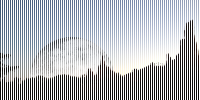

In [7]:
NB. Show bitmap image
viewrgb img

In [8]:
NB. Encrypt and hide secret message
stegimg =: ('The Truth Is Out There';'My Secret Password') hidemsg img

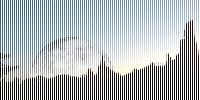

In [9]:
NB. Show bitmap image with embedded message. Is there any difference visible to the naked eye ???
viewrgb stegimg

In [10]:
NB. Extract secret message
]secmsg =: 'My Secret Password' showmsg stegimg

The Truth Is Out There
